## An example how to calculate sdg 11.2 indicator for Friedrichshain (Berlin)

In [1]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
from matplotlib import pyplot as plt
from ptac import accessibility as accessibility

Load stops and population data and generate boundary from population data.
The boundary is necessary to download the network afterwards.

In [2]:
stops = gpd.read_file(project_path + "/data/pt_example.gpkg")
population_points = gpd.read_file(project_path + "/data/population_example.gpkg")
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[population_points.unary_union.convex_hull])

Plot population and pt stops

<AxesSubplot:>

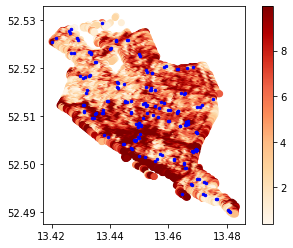

In [3]:
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True)
stops.plot(color="blue", ax=ax, markersize=6)

Calculate sum of population in the focus area

In [4]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 88270.7075406313


Now calculate the accessibilities from population point data to stations

In [5]:
accessibility_output = accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops,
                                  boundary_geometries=boundary_gdf,
                                  epsg=25833,
                                  network_exists=False,
                                  verbose=5)


No street network was specified. Loading osm network..

Starting UrMoAC to calculate accessibilities

UrMoAC request: java -jar -Xmx12g C:\Simon\git\PtAC\ptac/UrMoAccessibilityComputer-0.1-PRERELEASE-shaded.jar --from file;"tmp/origins.csv" --shortest --to file;"tmp/destinations.csv" --mode foot --time 35580 --epsg 25833 --ext-nm-output "file;tmp/sdg_output.txt" --verbose --threads 4 --dropprevious --date 20200915 --net "file;tmp/network.csv"

accessibility to public transport calculated in 48 seconds


Select starting points which are within 500 meters from the next station

In [6]:

accessibility_output = accessibility_output[accessibility_output["distance_pt"]<500]

Calculate sum of population with access to pt within 500 meters

In [7]:
sum_pop_with_access = accessibility_output["pop"].sum()
print(sum_pop_with_access)

84583.49746799469


Calculate the actual indicator and print the result

In [8]:
sdg_indicator = accessibility.calculate_sdg(population_sum,sum_pop_with_access)
print(" %s percent of the population have access"%sdg_indicator)

Calulating SDG 11.2. indicator ... 
SDG 11.2. indicator is calculated 
 0.9582283843035996 percent of the population have access


Plot result as a map

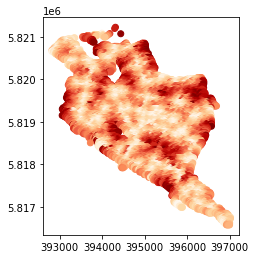

In [10]:
accessibility_output.plot(column='distance_pt', cmap='OrRd')
plt.show()
